In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

In [31]:
nome_arquivo_csv = 'data/State_of_data_BR.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [32]:
keys_questions_id = [
    name
    .split('\',')
    [0]
    .replace('(', '')
    .replace('\'', '')
    .replace(' ', '') 
    for name in dados.columns
]

values_questions_id = [
    name
    .split('\',')
    [1]
    .replace(')', '')
    .replace('\'', '') 
    [1:]
    for name in dados.columns
]

# Create dict
dict_questions_id = {
    key: value
    for key, value in zip(keys_questions_id, values_questions_id)
}


# DF auxiliar para avaliar e segmentar perguntas
questions_df = pd.DataFrame(dict_questions_id, index=['Pergunta']).T.reset_index().rename(columns={'index': 'col_id'})


# Tratando df auxiliar
questions_df = (
    questions_df.assign(
        Parte_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[0],
        Pergunta_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[1],
        Opcao_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[2],
    )
    .merge(
        pd.DataFrame({
            'Parte_id': [str(x) for x in range(9)],
            'Parte': [
                'id',
                'Dados demográficos',
                'Dados sobre carreira',
                'Desafios dos gestores de times de dados',
                'Conhecimentos na área de dados',
                'Objetivos na área de dados',
                'Conhecimentos em Engenharia de Dados/DE',
                'Conhecimentos em Análise de Dados/DA',
                'Conhecimentos em Ciências de Dados/DS'
            ]
        }),
        on='Parte_id',
        how='left'
    )
)


## Tratando nome das colunas e criando colunas com identificadores das perguntas
new_column_names = [name.split(',')[1].replace(')', '').replace('\'', '') for name in dados.columns]


dados.columns = keys_questions_id

## Análise do público geral 

* A seguir faremos uma análise mais geral do público, observado como o público se comporta em questão de genero, etnia e deficiência.

* É possivel ver no gráfico abaixo que em questões de genêro a maior parte do publico é do genêro masculino enquanto o genêro feminino tem menos da metade dos números do genêro masculino e os que não informaram seu genêro são menos de 30 casos.  
Com essa análise vemos que mesmo com tantas ações afirmativas para agregar outros genêros a área de tecnologia o genêro masculino ainda não tem tanto destaque em números e vemos ainda que para termos uma representatividade maior do público feminino devemos realizar mais ações afirmativas e gerar maais interesse para o público feminino entrar nessa área.

In [ ]:
df_p1 = dados.filter(regex='^P1')

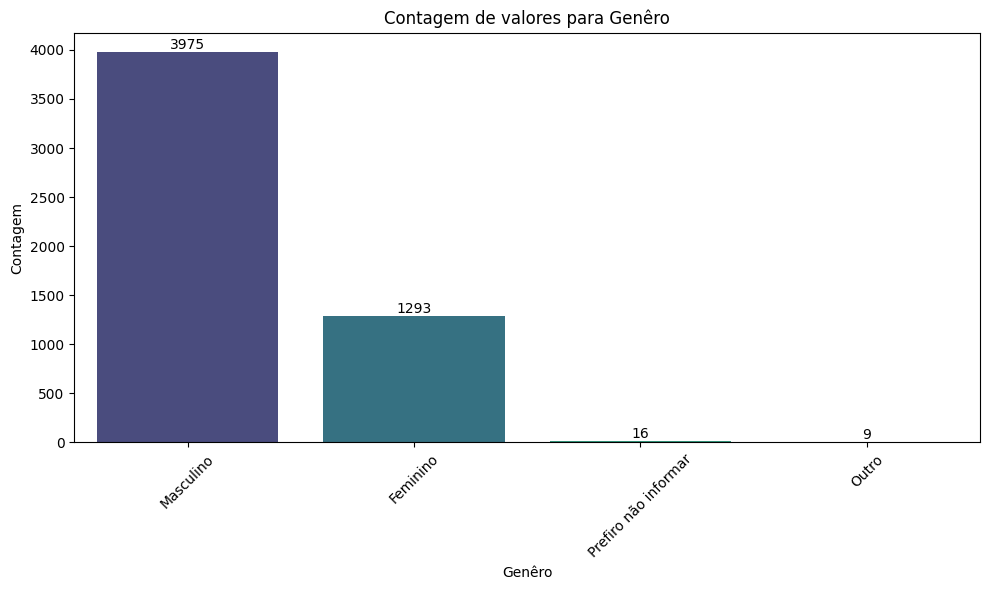

In [34]:
value_counts = df_p1['P1_b'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Genêro')
plt.ylabel('Contagem')
plt.title('Contagem de valores para Genêro')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

for i in range(len(value_counts)):
    plt.text(i, value_counts.values[i], str(value_counts.values[i]), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

* Ao análisar a etnia das pessoas também é possivel ver que em grande maioria são as pessoas brancas e pardas que ocupam estes cargos na área da tecnologia.   
As etnias menos favorecidas como preta e indigena tem menos ocupação nessas áreas de tecnologia mesmo com tantas ações afirmativas que buscam incluir essas pessoas na área de tecnologia.

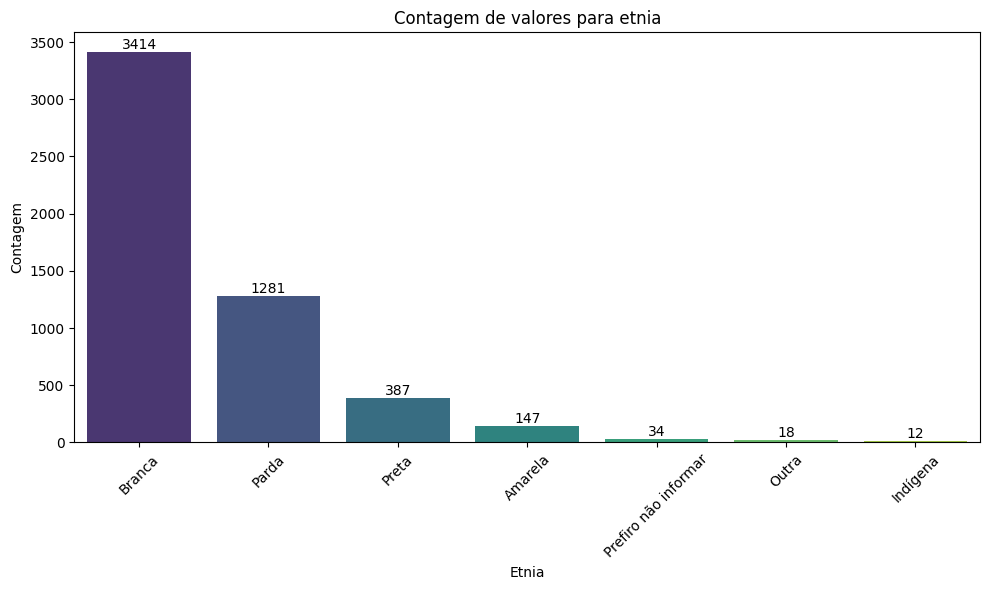

In [35]:
value_counts = df_p1['P1_c'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.title('Contagem de valores para etnia')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

for i in range(len(value_counts)):
    plt.text(i, value_counts.values[i], str(value_counts.values[i]), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

* Ao análisar a contagem de PCD vemos que segue o mesmo fluxo das outras análises, as ações afirmativas não conseguem incluir de forma a igualar o número de trabalhadores.   
Com isso vemos que os trabalhadores da área de tecnologia ainda precisa de mais diversidade, incluindo todos os tipos de pessoas nesta área que é tão acessivel as pessoas.   
É necessário criar mais ações afirmativas que incentivem as pessoas a trabalhar com tecnologia e se interessar por essa área que possui grande crescimento.

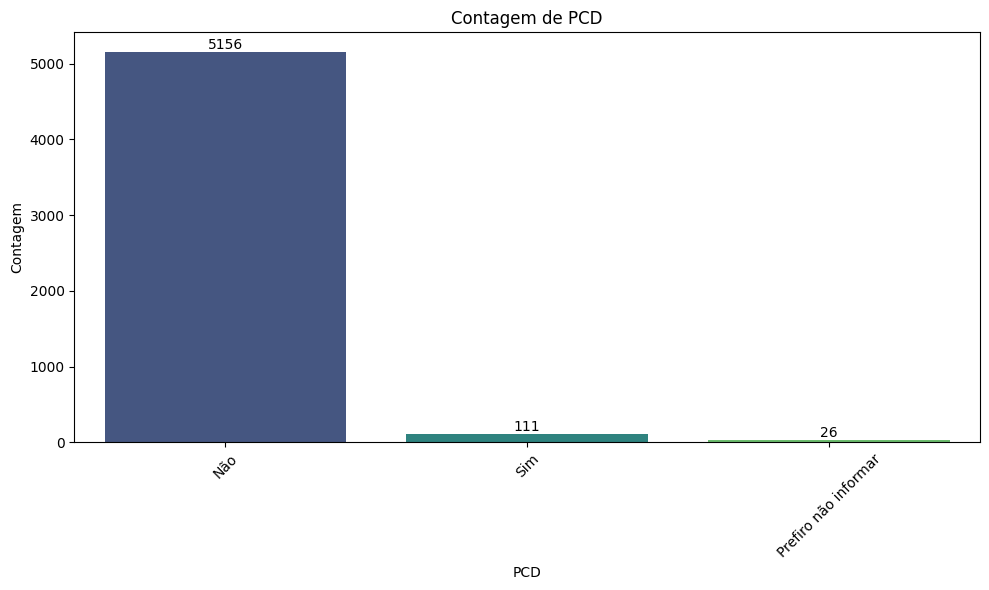

In [36]:
value_counts = df_p1['P1_d'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('PCD')
plt.ylabel('Contagem')
plt.title('Contagem de PCD')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

for i in range(len(value_counts)):
    plt.text(i, value_counts.values[i], str(value_counts.values[i]), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()